In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
import numpy as np
z_mean = np.load("TCR-RNA Data/z_mean.npy")

In [ ]:
print(z_mean.shape)

(7965, 2)


In [ ]:
print(z_mean[0])

[-0.18428972  0.17507207]


[[2270, 247.89395694471006], [6129, 57.851710577480155], [4160, 878.9075927676029], [3573, 95.95755819130333], [3137, 471.55668573681146]]
[[6654, 80.90048694208429], [5144, 180.9217272150387], [1691, 643.7314655615487], [3478, 113.26830669987261], [5669, 355.20560175010183]]
[[6654, 80.24996659586658], [4221, 287.5216674701025], [4975, 529.173860784394], [3478, 116.06280151841517], [3340, 240.2174799370979]]
[[6654, 82.43590106361813], [2433, 405.0819596249117], [5981, 368.3797780260922], [3478, 118.344656969488], [5524, 112.61760433966728]]
[[6654, 81.78538071740043], [4345, 408.0787342138783], [4585, 316.52317300313325], [3478, 113.14155595637966], [7029, 126.67053244808669]]
[[6654, 81.78538071740043], [4680, 397.6760416617378], [2305, 218.89695655926513], [3478, 106.49342619759652], [3823, 190.14415057803632]]
[[6654, 81.78538071740043], [53, 377.7801057671738], [3734, 213.59613525148617], [3573, 98.49993089932151], [3823, 201.50370078552243]]
[[6654, 81.78538071740043], [53, 360.

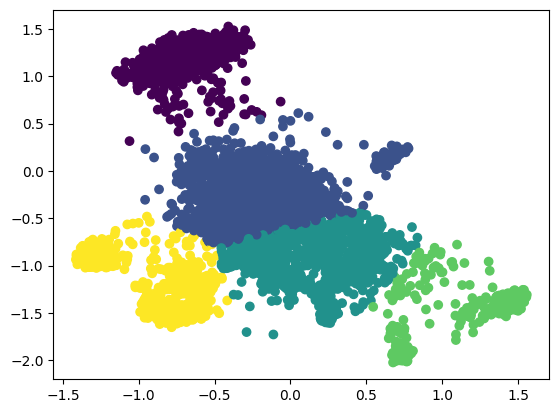

In [ ]:
import matplotlib.pyplot as plt
import random

def calculate_distance(a, b):
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2

class kmediod():
    def __init__(self,npoints,ncenter):
        self.npoints=npoints
        self.ncenter=ncenter
        self.data=None
        
    def get_data(self, data):
        self.data = data

    def k_center(self):
        medoids = random.sample(range(self.npoints), self.ncenter)
        for repeat in range(10):
            label = []
            clusters = [[] for i in range(self.ncenter)]
            for point in range(self.npoints):
                min = float("inf")
                cluster = 0
                for medoid in range(len(medoids)):
                    distance = calculate_distance(self.data[point], self.data[medoids[medoid]])
                    if distance < min:
                        cluster = medoid
                        min = distance
                label.append(cluster)
                clusters[cluster].append(point)
            cluster_costs = [[0, float("inf")] for i in range(self.ncenter)]
            for point in range(self.npoints):
                cluster = label[point]
                total_cost = 0
                for cluster_point in clusters[cluster]:
                    total_cost += calculate_distance(self.data[point], self.data[cluster_point])
                if total_cost < cluster_costs[cluster][1]:
                    cluster_costs[cluster] = [point, total_cost]
            medoids = []
            print(cluster_costs)
            for cluster in cluster_costs:
                medoids.append(cluster[0])
        return np.array(label)
 
    def run(self, data):
        self.get_data(data)
        newlabel = self.k_center()
        plt.scatter(self.data[:, 0], self.data[:, 1], c=newlabel)
        plt.show()
        return(newlabel)
 
 
test = kmediod(npoints=len(z_mean), ncenter=5)
clusters = test.run(z_mean)
np.save("TCR-RNA Data/clusters.npy", clusters)

In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
import numpy as np
specificity = list(np.load("Preprocessed Data/specificity.npy"))
clusters = list(np.load("TCR-RNA Data/clusters.npy"))

In [ ]:
unique_specificity = list(set(specificity))
print(unique_specificity)

['A1101_IVTDFSVIK_EBNA-3B_EBV_binder', 'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder', 'A0301_KLGGALQAK_IE-1_CMV_binder', 'A0201_ELAGIGILTV_MART-1_Cancer_binder', 'A0201_GILGFVFTL_Flu-MP_Influenza_binder']


In [ ]:
unique_clusters = list(set(clusters))
print(unique_clusters)

[0, 1, 2, 3, 4]


In [ ]:
import itertools

perms = itertools.permutations(unique_specificity)

perms = list(perms)

In [ ]:
for i in range(len(perms)):
  perms[i] = list(perms[i])

In [ ]:
perms[0]

['A1101_IVTDFSVIK_EBNA-3B_EBV_binder',
 'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder',
 'A0301_KLGGALQAK_IE-1_CMV_binder',
 'A0201_ELAGIGILTV_MART-1_Cancer_binder',
 'A0201_GILGFVFTL_Flu-MP_Influenza_binder']

In [ ]:
clusters[0 : 5]

[1, 4, 4, 4, 4]

In [ ]:
import copy

accuracies = []
for perm in perms:
  y_pred = copy.deepcopy(clusters)
  y_test = specificity
  for i in range(len(y_pred)):
    y_pred[i] = perm[y_pred[i]]
  count = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
      count += 1
  accuracy = count / len(y_pred)
  accuracies.append(accuracy)

In [ ]:
print(max(accuracies))
print(accuracies.index(max(accuracies)))

0.6360326428123039
6


In [ ]:
print(perms[6])

['A1101_IVTDFSVIK_EBNA-3B_EBV_binder', 'A0301_KLGGALQAK_IE-1_CMV_binder', 'A1101_AVFDRKSDAK_EBNA-3B_EBV_binder', 'A0201_ELAGIGILTV_MART-1_Cancer_binder', 'A0201_GILGFVFTL_Flu-MP_Influenza_binder']


In [ ]:
perm = perms[6]
y_pred = copy.deepcopy(clusters)
y_test = specificity
for i in range(len(y_pred)):
  y_pred[i] = perm[y_pred[i]]
count = 0
for i in range(len(y_pred)):
  if y_pred[i] == y_test[i]:
    count += 1
accuracy = count / len(y_pred)
print(accuracy)

0.6360326428123039


In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
import numpy as np
specificity = list(np.load("Preprocessed Data/specificity.npy"))
clusters = list(np.load("TCR-RNA Data/clusters.npy"))

In [ ]:
# y_test = specificity
# y_pred = copy.deepcopy(clusters)

# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# precision = tp / (tp + fp)
# recall = tp / (tp + fn)
# accuracy = (tp + tn) / ((tp + fn) + (fp + tn))
# iou = tp / (tp + fn + fp)
# f1 = (2 * tp) / (2 * tp + fn + fp)

# print("TP: {}".format(tp))
# print("TN: {}".format(tn))
# print("FP: {}".format(fp))
# print("FN: {}".format(fn))
# print()

# print("Precision: {:.4f}".format(precision))
# print("Recall: {:.4f}".format(recall))
# print("Accuracy: {:.4f}".format(accuracy))
# print("IoU: {:.4f}".format(iou))
# print("F1 Score: {:.4f}".format(f1))